# Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/smoker_train.csv")

## Allgemeine Analyse

In [ ]:
df.head()

In [ ]:
df.info()

## Merkmale

### Personendaten

In [ ]:
# Smoking
smoking_counts = df["smoking"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])
plt.tight_layout()
plt.show()

In [ ]:
# Age
plt.figure(figsize=(8, 4))
age_count = df['age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values, width=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Scatter plot: height vs weight
plt.figure(figsize=(8, 4))
plt.scatter(df['height(cm)'], df['weight(kg)'], alpha=0.3)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Boxplot of weight by smoking status
df.boxplot(column='weight(kg)', by='smoking')
plt.title('Weight by Smoking Status')
plt.suptitle('')
plt.xlabel('Smoking')
plt.ylabel('Weight (kg)')
plt.show()

### Gesundheitswerte

In [ ]:
# Create the data for the table
data = {
    "Intervall": ["[0, 1)", "[1, 2)", "[2, 3)", "[3, 9)", "[9, 10]"],
    "Eyesight (left)": [
        df[(df['eyesight(left)'] >= 0) & (df['eyesight(left)'] < 1)].shape[0],
        df[(df['eyesight(left)'] >= 1) & (df['eyesight(left)'] < 2)].shape[0],
        df[(df['eyesight(left)'] >= 2) & (df['eyesight(left)'] < 3)].shape[0],
        df[(df['eyesight(left)'] >= 3) & (df['eyesight(left)'] < 9)].shape[0],
        df[(df['eyesight(left)'] >= 9) & (df['eyesight(left)'] < 10)].shape[0]
    ],
    "Eyesight (right)": [
        df[(df['eyesight(right)'] >= 0) & (df['eyesight(right)'] < 1)].shape[0],
        df[(df['eyesight(right)'] >= 1) & (df['eyesight(right)'] < 2)].shape[0],
        df[(df['eyesight(right)'] >= 2) & (df['eyesight(right)'] < 3)].shape[0],
        df[(df['eyesight(right)'] >= 3) & (df['eyesight(right)'] < 9)].shape[0],
        df[(df['eyesight(right)'] >= 9) & (df['eyesight(right)'] <= 10)].shape[0]
    ]
}

# Create DataFrame
eyesight_df = pd.DataFrame(data)

# Print the table
print(eyesight_df.to_string(index=False))

### Laborwerte

In [ ]:
# Urin Protein Verteilung
df_urine = pd.read_csv("data/smoker_train.csv", usecols=["Urine protein"])
urine_counts = df_urine["Urine protein"].value_counts().sort_index()
print(urine_counts)

## Lage- und Steuungsmaße

In [ ]:
lagemasse = df.describe().transpose()

lagemasse["rel. diff"] = (lagemasse["mean"]-lagemasse["50%"])/lagemasse["mean"]

lagemasse

## Korrelation

### Kardinale Merkmale

In [42]:
# Definitions
cardinal_features = [
    "waist(cm)",
    "age",
    "height(cm)",
    "weight(kg)",
    "smoking",
    "systolic",
    "relaxation",
    "eyesight(left)",
    "eyesight(right)",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "AST",
    "ALT",
    "Gtp",
    "fasting blood sugar",
    "hemoglobin",
    "serum creatinine",
]

ordinal_features = [
    "Urine protein" # 1, 2, 3, 4, 5, 6
]

nominal_features = [
    "hearing(left)",    # 1 and 2
    "hearing(right)",   # 1 and 2
    "dental caries"     # 0 and 1
]

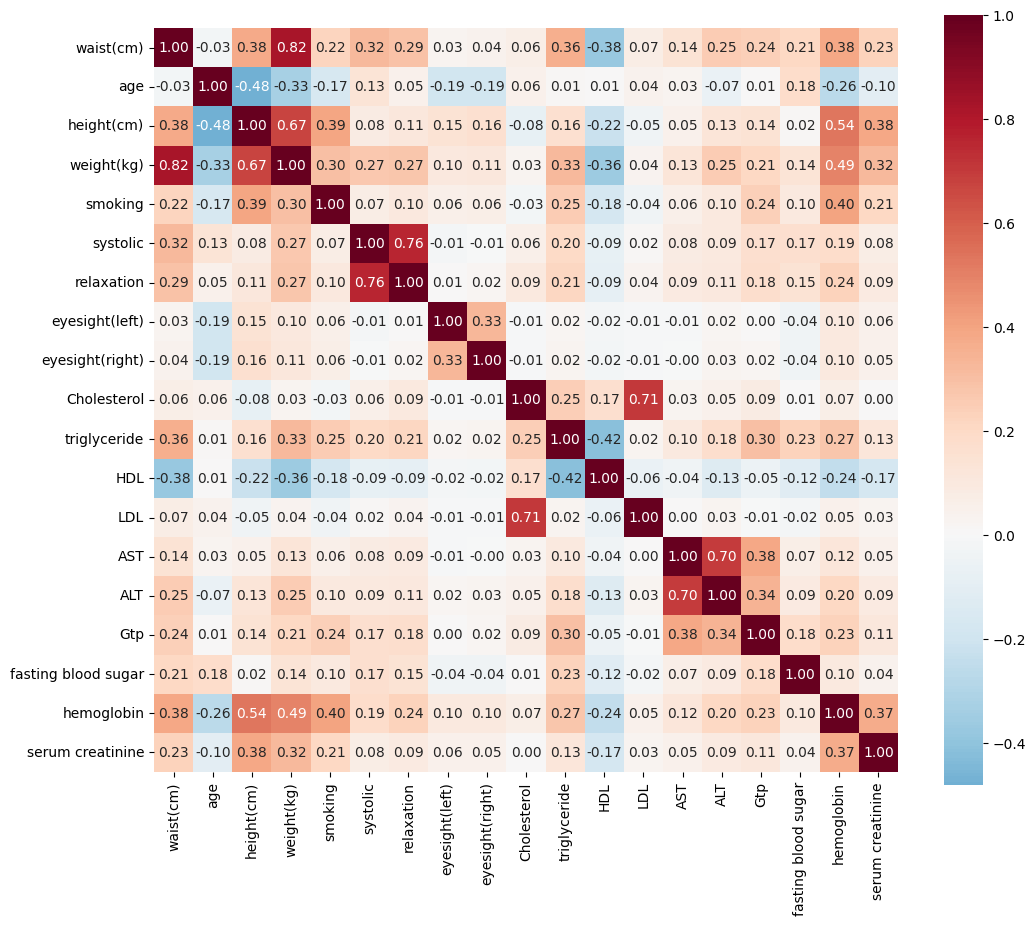

In [43]:
# Pearson
df_cardinal = df[cardinal_features]

corr_pearson = df_cardinal.corr(method='pearson')

plt.figure(figsize=(12, 10))

sns.heatmap(corr_pearson, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True)

plt.show()

### Korrelationen mit der Zielvariablen

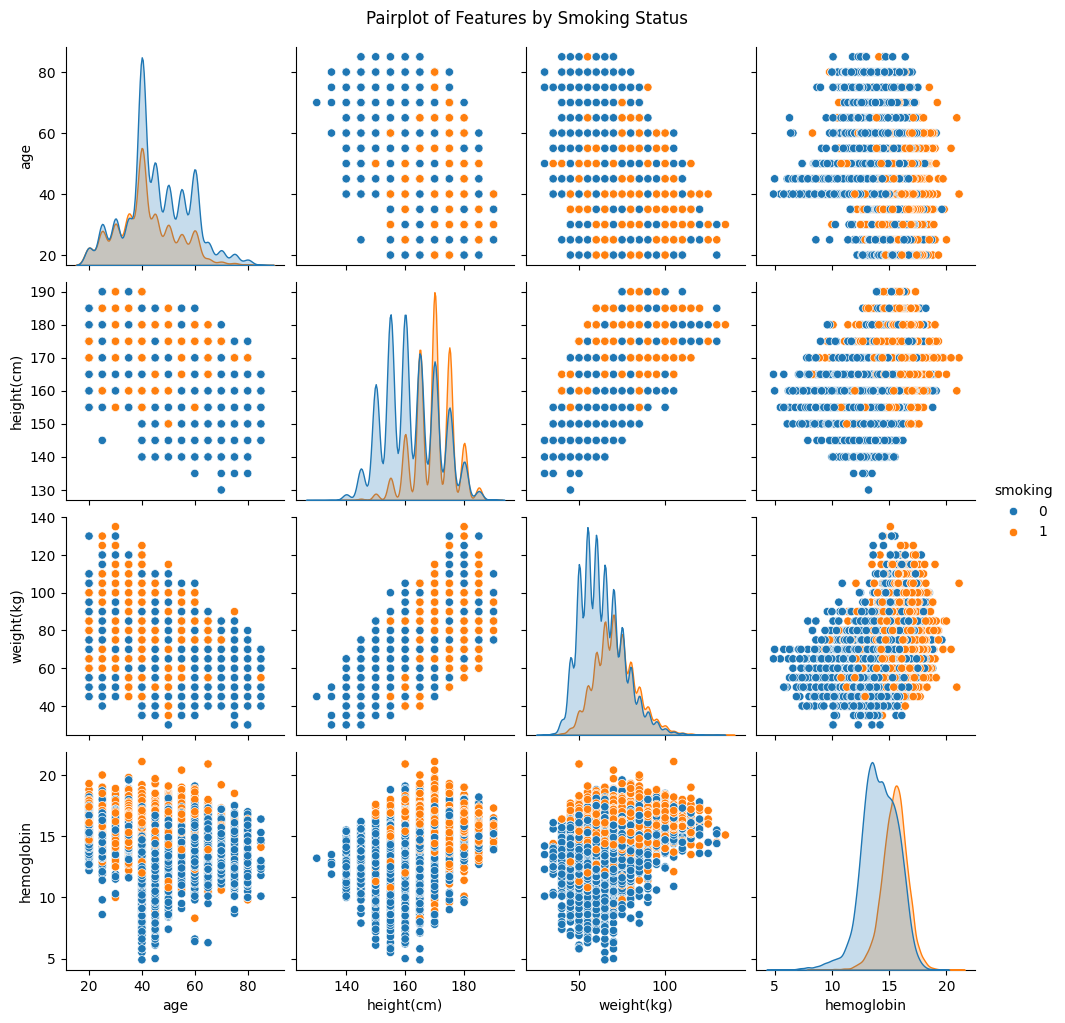

In [37]:
# Pairplot 
sns.pairplot(df, hue='smoking', vars=['age', 'height(cm)', 'weight(kg)', 'hemoglobin'])
plt.suptitle('Pairplot of Features by Smoking Status', y=1.02)
plt.show()

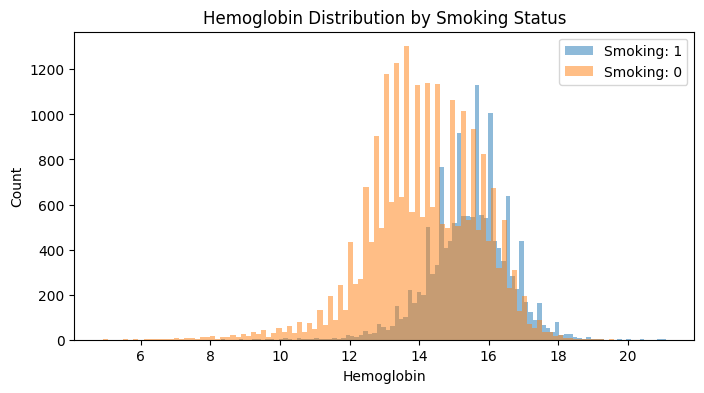

In [38]:
# Hemoglobin - Smoking
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['hemoglobin'], bins=100, alpha=0.5, label=f'Smoking: {status}')
plt.title('Hemoglobin Distribution by Smoking Status')
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.legend()
plt.show()

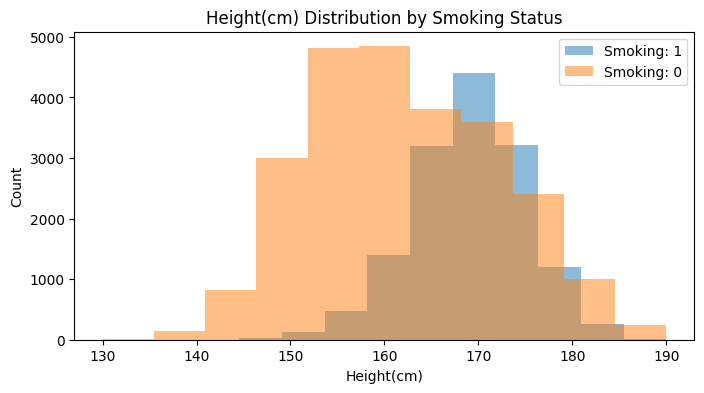

In [39]:
# Height - Smoking
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['height(cm)'], bins=11, alpha=0.5, label=f'Smoking: {status}')
plt.title('Height(cm) Distribution by Smoking Status')
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.legend()
plt.show()

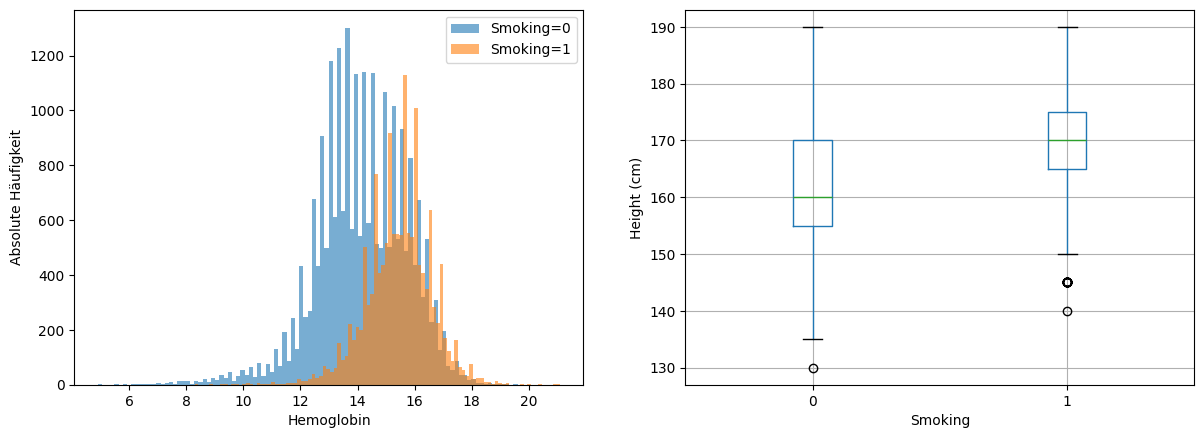

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, group in df.groupby('smoking'):
    axes[0].hist(group['hemoglobin'], bins=100, alpha=0.6, label=f'Smoking={label}')
axes[0].set_xlabel('Hemoglobin')
axes[0].set_ylabel('Absolute Häufigkeit')
axes[0].legend()

df.boxplot(column='height(cm)', by='smoking', ax=axes[1])
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Height (cm)')
axes[1].set_title('')
axes[1].set_xticklabels([0, 1])
axes[1].get_figure().suptitle('')

plt.show()

## Benfords Law Factory

In [ ]:
benford_freq = np.log10(1 + 1 / np.arange(1, 10))

for col in df.columns:
    if df[col].dtype.kind in 'biufc':  # numeric columns only
        values = df[col].dropna().astype(str)
        leading_digits = values.str.lstrip('0').str.extract(r'^(\d)').dropna()[0].astype(int)
        observed_counts = leading_digits.value_counts().sort_index()
        observed_freq = observed_counts / observed_counts.sum()

        plt.figure(figsize=(8, 4))
        plt.bar(observed_freq.index, observed_freq.values, alpha=0.7, label='Tatsächliche Verteilung')
        plt.plot(np.arange(1, 10), benford_freq, 'ro-', label="Benford's Law")
        plt.xlabel('Führende Ziffer')
        plt.ylabel('Rel. Häufigkeit')
        # plt.title(f"Leading Digit Distribution vs Benford's Law ('{col}')")
        plt.legend()
        plt.show()
